# 로드킬근거자료19-23년

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False


In [19]:
# ✅ 1단계: 데이터프레임으로 읽고 간단히 출력하기

import pandas as pd

base_path = './data/로드킬근거자료19-23/'

# 파일 경로
file_권역 = base_path + '로드킬_권역별_통계.csv'
file_도로유형 = base_path + '로드킬_도로유형별_통계.csv'
file_종별 = base_path + '로드킬_종별_통계.csv'

# 인코딩해서 읽기
df_권역 = pd.read_csv(file_권역, encoding='utf-8')
df_도로유형 = pd.read_csv(file_도로유형, encoding='utf-8')
df_종별 = pd.read_csv(file_종별, encoding='utf-8')


# 각각 상위 5개 출력
print("📌 [권역별 통계]")
print(df_권역.head(), "\n")

print("📌 [도로유형별 통계]")
print(df_도로유형.head(), "\n")

print("📌 [종별 통계]")
print(df_종별.head())



📌 [권역별 통계]
  구 분 2019년 2020년  2021년  2022년  2023년
0  서울     7     6      5  1,007  1,576
1  부산    39    29  5,001  3,142  2,869
2  대구    89    76     63  1,825  2,965
3  인천    10    54  1,490  2,122  2,607
4  광주     5    11  1,744  1,314  2,131 

📌 [도로유형별 통계]
      구 분   2019년   2020년   2021년   2022년   2023년
0      국도  17,502  11,924  13,604  20,883  28,780
1    고속도로   1,866   1,584   1,194   1,265   1,045
2     지방도   1,230     906   3,710   7,494   6,439
3  시·군·구도     716     689  16,715  30,711  38,432
4   기타 도로      83       4   2,038   3,636   4,582 

📌 [종별 통계]
     구 분     고라니    너구리  멧돼지   노루  오소리      개     고양이      기타
0  2019년  11,638  1,731  315  557  141  1,016   4,661   1,338
1  2020년   6,864  1,415  134  610  136    654   3,008   2,286
2  2021년  10,847  2,291  124  872  245  1,605  17,527   3,750
3  2022년  16,075  3,353  136  967  376  2,257  31,880   8,945
4  2023년  18,267  4,011  192  968  510  2,575  38,143  14,612


In [20]:
print(df_권역.shape)
print(df_권역.columns.tolist())
print(df_권역.info())


(18, 6)
['구 분', '2019년', '2020년', '2021년', '2022년', '2023년']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구 분     18 non-null     object
 1   2019년   18 non-null     object
 2   2020년   18 non-null     object
 3   2021년   18 non-null     object
 4   2022년   18 non-null     object
 5   2023년   18 non-null     object
dtypes: object(6)
memory usage: 996.0+ bytes
None


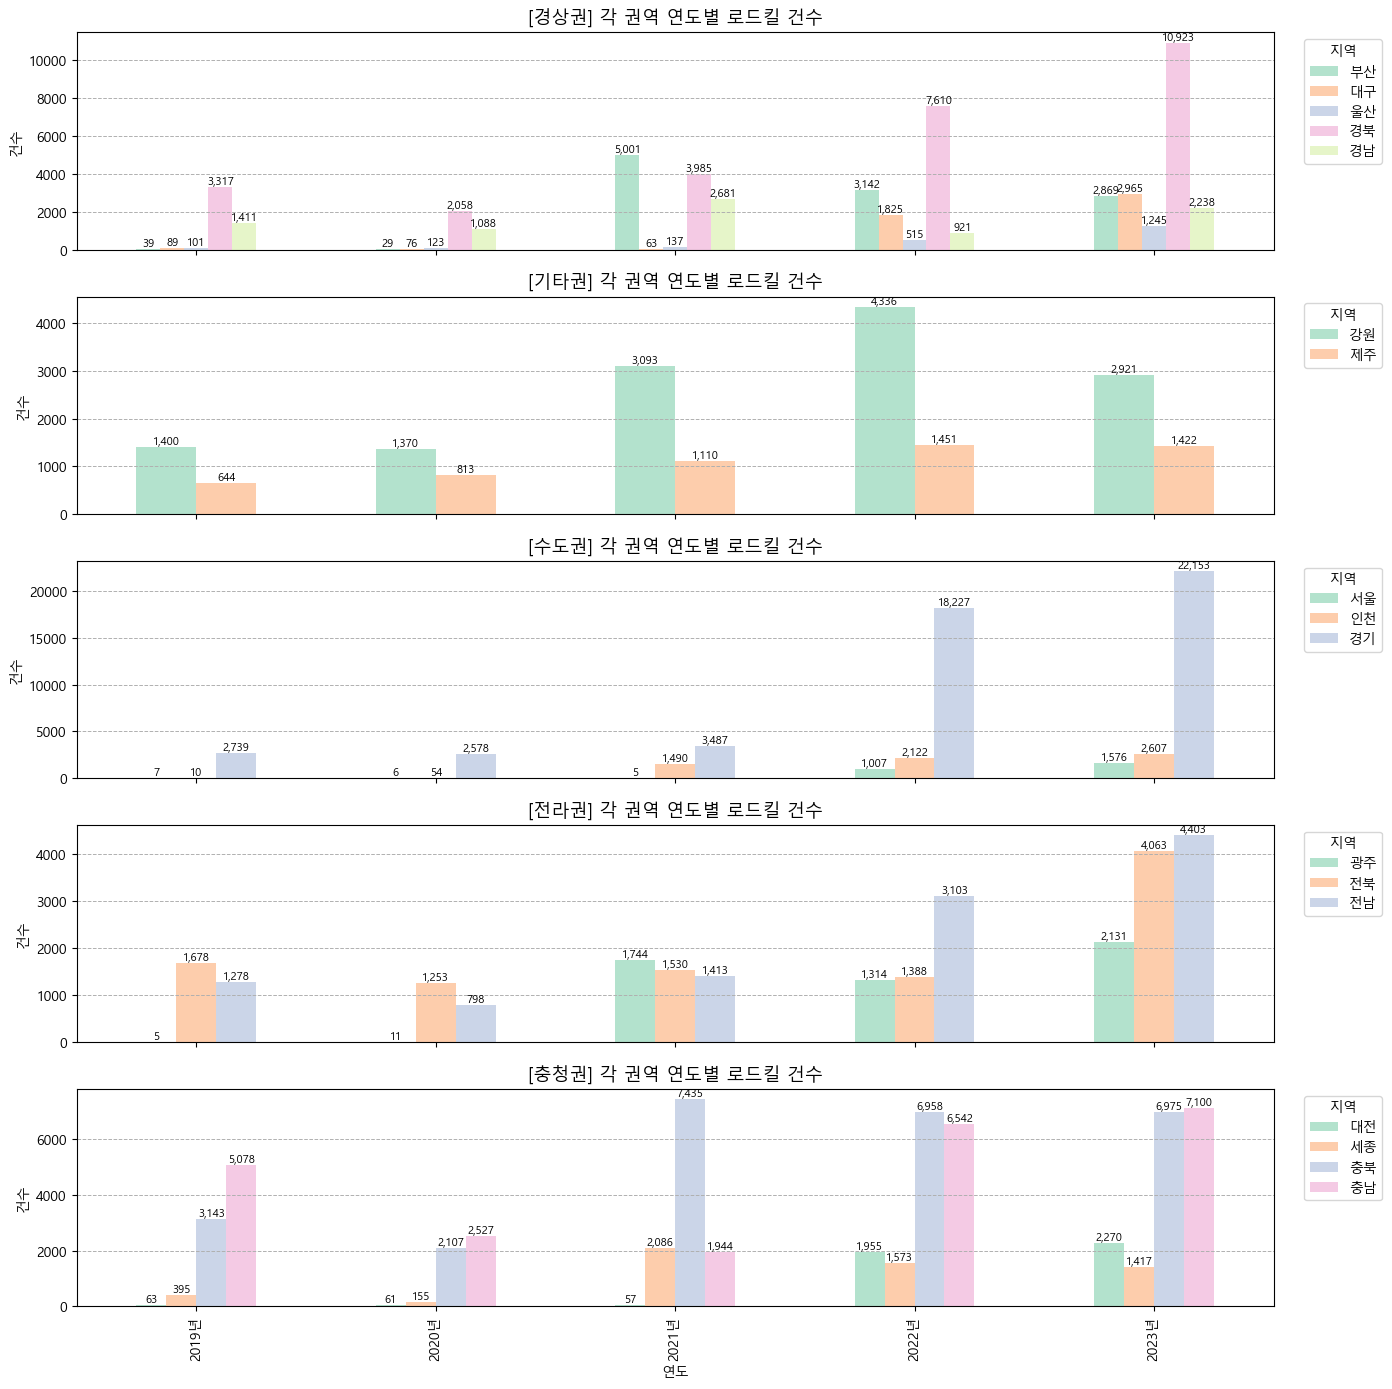

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 파일 경로 (네 로컬 경로 그대로 유지)
file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_권역별_통계.csv'

# 데이터 불러오기
df = pd.read_csv(file_path, encoding='utf-8')
df = df[df['구 분'] != '합계'].copy()

# 문자열 숫자 변환
for col in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# 인덱스 설정
df.set_index('구 분', inplace=True)

# 지역 그룹핑
group_map = {
    '서울': '수도권', '인천': '수도권', '경기': '수도권',
    '대전': '충청권', '세종': '충청권', '충북': '충청권', '충남': '충청권',
    '광주': '전라권', '전북': '전라권', '전남': '전라권',
    '강원': '기타권', '제주': '기타권',
    '경북': '경상권', '경남': '경상권', '울산': '경상권', '부산': '경상권', '대구': '경상권'
}
df['지역권역'] = df.index.map(group_map)

# 색상: 파스텔톤
pastel_colors = plt.cm.Pastel2.colors

# 시각화: 권역별 subplot
grouped = df.groupby('지역권역')
fig, axs = plt.subplots(len(grouped), 1, figsize=(14, 14), sharex=True)

for ax, (region, data) in zip(axs, grouped):
    plot_data = data.drop(columns='지역권역').T
    bars = plot_data.plot(kind='bar', ax=ax, color=pastel_colors, legend=False)

    # 숫자 라벨 표시
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='{:,.0f}', fontsize=8)

    ax.set_title(f'[{region}] 각 권역 연도별 로드킬 건수', fontsize=13)
    ax.set_ylabel('건수')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7)
    ax.legend(title='지역', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xlabel('연도')
plt.tight_layout()
plt.show()


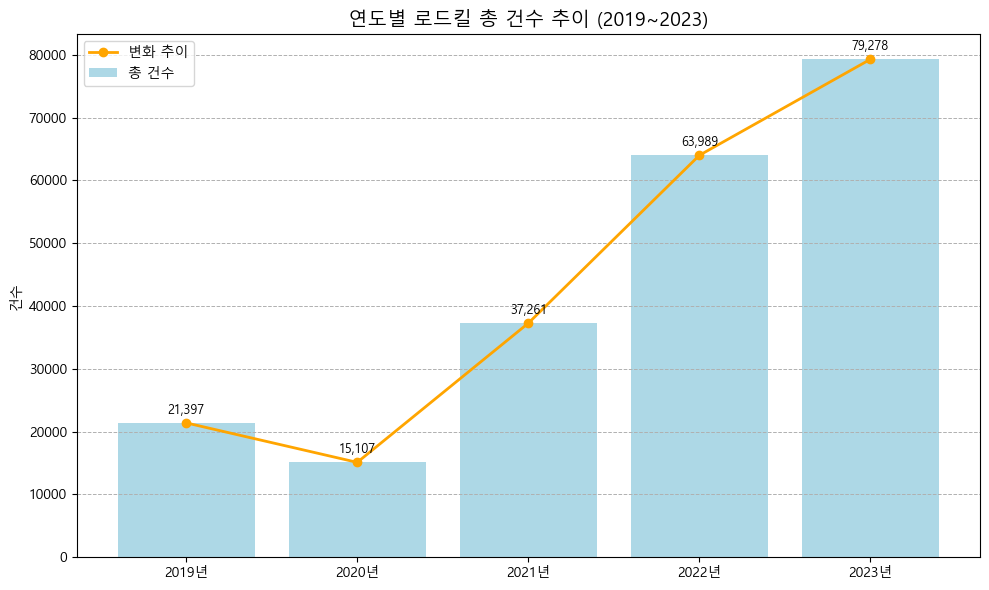

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# ✅ 연도별 합계 직접 입력 (이미 정리된 데이터 기준)
years = ['2019년', '2020년', '2021년', '2022년', '2023년']
totals = [21397, 15107, 37261, 63989, 79278]

# ✅ 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대차트
bars = ax1.bar(years, totals, color='lightblue', label='총 건수')

# 라인차트 (꺾은선)
ax1.plot(years, totals, color='orange', marker='o', linewidth=2, label='변화 추이')

# 막대 위 숫자 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 1000, f"{height:,}", 
             ha='center', va='bottom', fontsize=9)
    


# 제목 및 기타 설정
plt.title('연도별 로드킬 총 건수 추이 (2019~2023)', fontsize=14)
plt.ylabel('건수')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


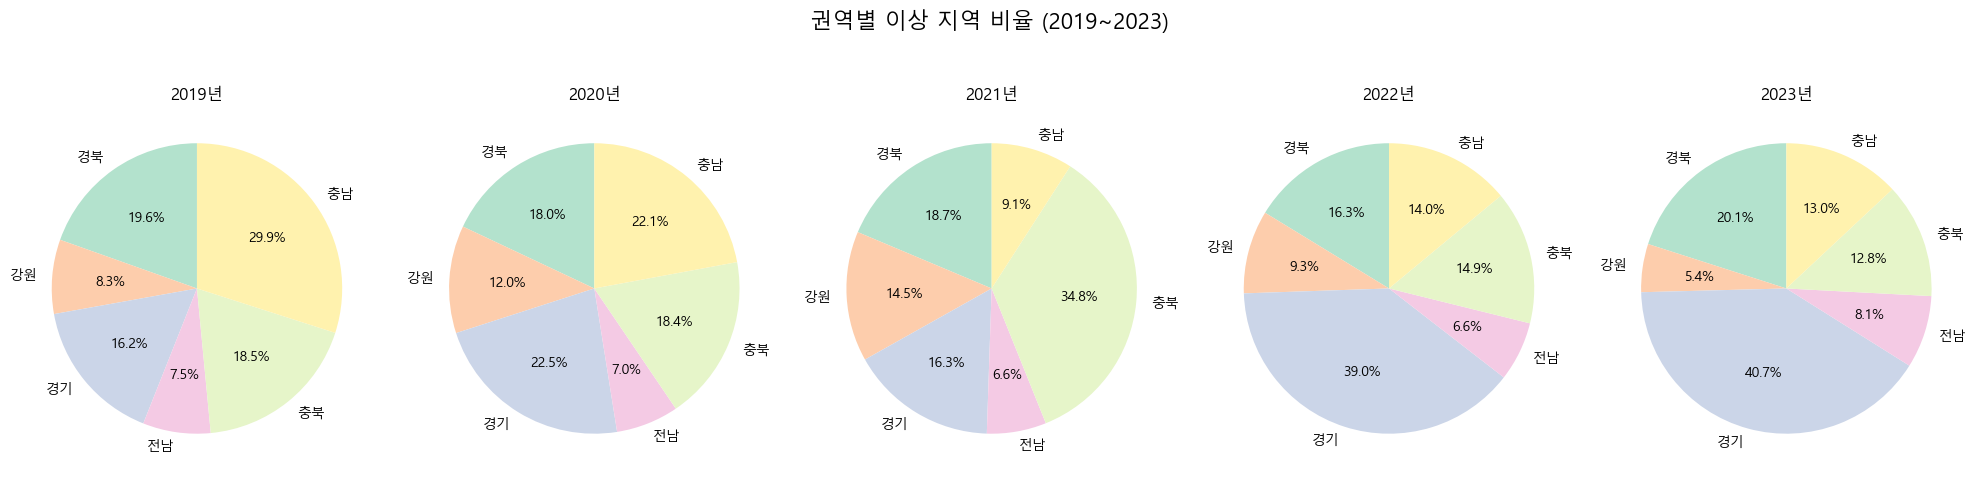

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 맑은 고딕 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 연도별 총 건수 데이터
years = ['2019년', '2020년', '2021년', '2022년', '2023년']
totals = [21397, 15107, 37261, 63989, 79278]

# 특정 지역 연도별 로드킬 건수
target_regions = {
    '경북': [3317, 2058, 3985, 7610, 10923],
    '강원': [1400, 1370, 3093, 4336, 2921],
    '경기': [2739, 2578, 3487, 18227, 22153],
    '전남': [1278, 798, 1413, 3103, 4403],
    '충북': [3143, 2107, 7435, 6958, 6975],
    '충남': [5078, 2527, 1944, 6542, 7100]
}

# 색상 고정
colors = plt.cm.Pastel2.colors

# 파이차트 5개 생성
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('권역별 이상 지역 비율 (2019~2023)', fontsize=16)

for i, year in enumerate(years):
    sizes = [target_regions[region][i] / totals[i] * 100 for region in target_regions]
    axs[i].pie(
        sizes,
        labels=target_regions.keys(),
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axs[i].set_title(f'{year}')

plt.tight_layout(rect=[0, 0, 1, 0.92])  # 제목이 가려지지 않게 여백 조정
plt.show()


In [24]:
# 1. 데이터 불러오기
file_도로유형 = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_도로유형별_통계.csv'
df_도로유형 = pd.read_csv(file_도로유형, encoding='utf-8')

# 2. 구조 확인
print("✅ df_도로유형 shape:", df_도로유형.shape)
print("✅ df_도로유형 columns:", df_도로유형.columns.tolist())
print("✅ df_도로유형 info:")
print(df_도로유형.info())


✅ df_도로유형 shape: (6, 6)
✅ df_도로유형 columns: ['구 분', '2019년', '2020년', '2021년', '2022년', '2023년']
✅ df_도로유형 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구 분     6 non-null      object
 1   2019년   6 non-null      object
 2   2020년   6 non-null      object
 3   2021년   6 non-null      object
 4   2022년   6 non-null      object
 5   2023년   6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes
None


In [25]:
import pandas as pd

# 1. 불러오기 (이미 불러왔다면 생략 가능)
# df_도로유형 = pd.read_csv(file_도로유형, encoding='utf-8')

# 2. 숫자형 컬럼 문자열 제거 후 정수형 변환
for col in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    df_도로유형[col] = df_도로유형[col].astype(str).str.replace(',', '').astype(int)

# 3. 데이터 확인
print("📌 [도로유형별 통계 전체]")
print(df_도로유형, "\n")

# 4. 연도별 출력 예시
for year in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    print(f"✅ {year} 도로 유형별 로드킬 건수")
    print(df_도로유형[['구 분', year]])
    print()


📌 [도로유형별 통계 전체]
      구 분  2019년  2020년  2021년  2022년  2023년
0      국도  17502  11924  13604  20883  28780
1    고속도로   1866   1584   1194   1265   1045
2     지방도   1230    906   3710   7494   6439
3  시·군·구도    716    689  16715  30711  38432
4   기타 도로     83      4   2038   3636   4582
5      합계  21397  15107  37261  63989  79278 

✅ 2019년 도로 유형별 로드킬 건수
      구 분  2019년
0      국도  17502
1    고속도로   1866
2     지방도   1230
3  시·군·구도    716
4   기타 도로     83
5      합계  21397

✅ 2020년 도로 유형별 로드킬 건수
      구 분  2020년
0      국도  11924
1    고속도로   1584
2     지방도    906
3  시·군·구도    689
4   기타 도로      4
5      합계  15107

✅ 2021년 도로 유형별 로드킬 건수
      구 분  2021년
0      국도  13604
1    고속도로   1194
2     지방도   3710
3  시·군·구도  16715
4   기타 도로   2038
5      합계  37261

✅ 2022년 도로 유형별 로드킬 건수
      구 분  2022년
0      국도  20883
1    고속도로   1265
2     지방도   7494
3  시·군·구도  30711
4   기타 도로   3636
5      합계  63989

✅ 2023년 도로 유형별 로드킬 건수
      구 분  2023년
0      국도  28780
1    고속도로   1045
2     지방도   6439
3  시·군·구도

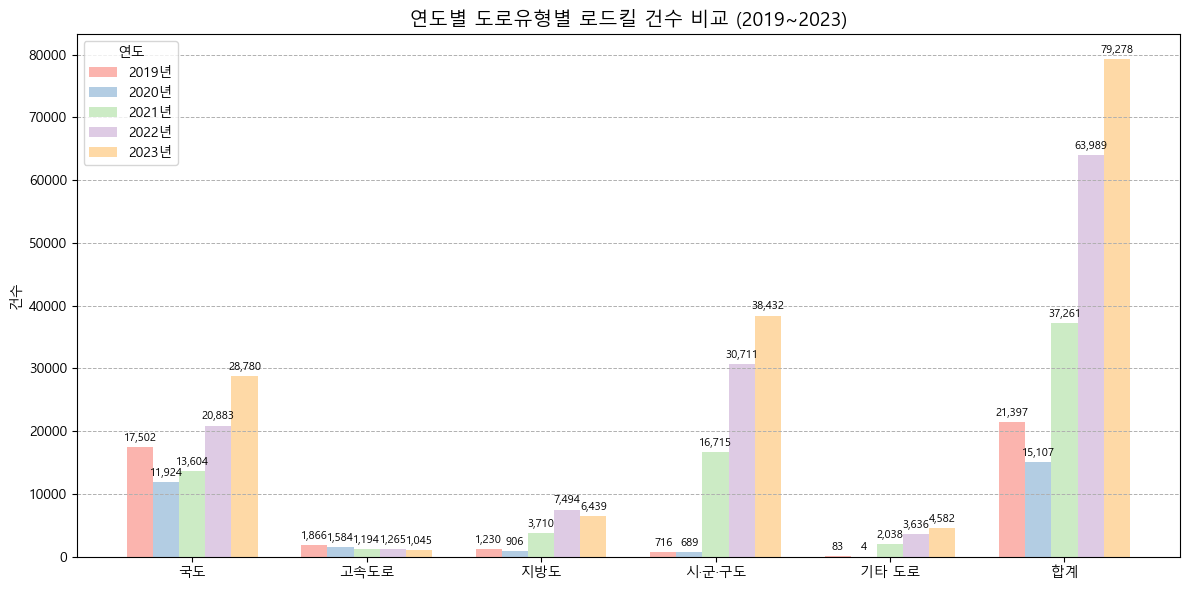

In [26]:
import matplotlib.pyplot as plt

# 연도 컬럼 리스트
year_columns = ['2019년', '2020년', '2021년', '2022년', '2023년']

# 시각화 (연도별 도로유형 막대 차트)
fig, ax = plt.subplots(figsize=(12, 6))

# 파스텔 색상 설정
colors = plt.cm.Pastel1.colors

# 연도별 그룹 막대차트
bar_width = 0.15
x = range(len(df_도로유형['구 분']))
for i, year in enumerate(year_columns):
    ax.bar(
        [pos + bar_width * i for pos in x],
        df_도로유형[year],
        width=bar_width,
        label=year,
        color=colors[i % len(colors)]
    )

# X축 레이블 설정
ax.set_xticks([pos + bar_width * 2 for pos in x])
ax.set_xticklabels(df_도로유형['구 분'])

# 수치 표시
for i, year in enumerate(year_columns):
    for j, value in enumerate(df_도로유형[year]):
        ax.text(j + bar_width * i, value + 500, f'{value:,}', ha='center', va='bottom', fontsize=8)

# 설정
plt.title('연도별 도로유형별 로드킬 건수 비교 (2019~2023)', fontsize=14)
plt.ylabel('건수')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='연도')
plt.tight_layout()
plt.show()


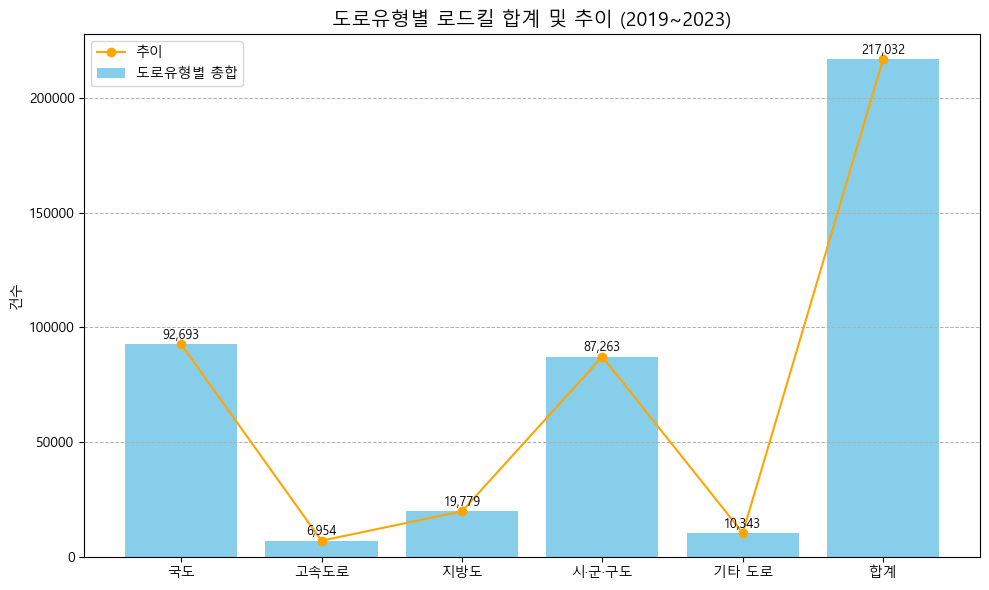

In [27]:
# 재실행: 커널 리셋된 상태이므로 필요한 코드 재구현
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_도로유형별_통계.csv'
df_도로유형 = pd.read_csv(file_path, encoding='utf-8')

# 문자열 숫자 → 정수형 변환
for col in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    df_도로유형[col] = df_도로유형[col].astype(str).str.replace(',', '').astype(int)

# 도로 유형별 가로합계 계산
df_도로유형['합계'] = df_도로유형[['2019년', '2020년', '2021년', '2022년', '2023년']].sum(axis=1)

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 차트
bars = ax1.bar(df_도로유형['구 분'], df_도로유형['합계'], color='skyblue', label='도로유형별 총합')

# 선형 꺾은선 차트
ax1.plot(df_도로유형['구 분'], df_도로유형['합계'], color='orange', marker='o', label='추이')

# 바 위에 텍스트 표시 (콤마 포함)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{height:,}', ha='center', va='bottom', fontsize=9)

# 설정
plt.title('도로유형별 로드킬 합계 및 추이 (2019~2023)', fontsize=14)
plt.ylabel('건수')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


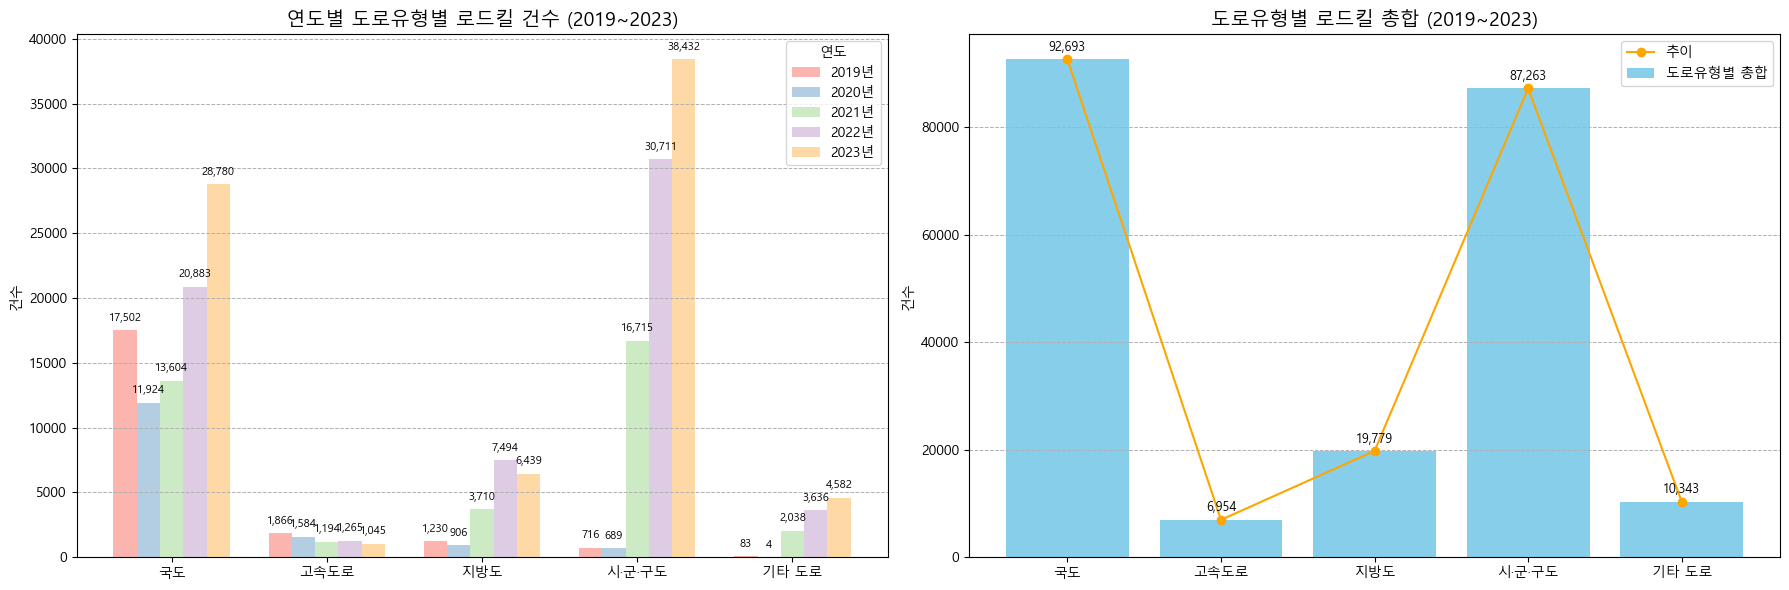

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로드
import pandas as pd

file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_도로유형별_통계.csv'
df_도로유형 = pd.read_csv(file_path, encoding='utf-8')


# 문자열 숫자 → 정수형 변환
for col in ['2019년', '2020년', '2021년', '2022년', '2023년']:
    df_도로유형[col] = df_도로유형[col].astype(str).str.replace(',', '').astype(int)

# 도로 유형별 가로합계 계산
df_도로유형['합계'] = df_도로유형[['2019년', '2020년', '2021년', '2022년', '2023년']].sum(axis=1)

# "합계" 항목 제외한 데이터프레임 생성
df_도로유형_no_total = df_도로유형[df_도로유형['구 분'] != '합계'].copy()

# 연도 리스트
years = ['2019년', '2020년', '2021년', '2022년', '2023년']
colors = plt.cm.Pastel1.colors

# 시각화: 2개의 subplot 가로 배치
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# ▶ 왼쪽: 연도별 막대 차트
bar_width = 0.15
x = range(len(df_도로유형_no_total['구 분']))

for i, year in enumerate(years):
    ax1.bar(
        [pos + bar_width * i for pos in x],
        df_도로유형_no_total[year],
        width=bar_width,
        label=year,
        color=colors[i % len(colors)]
    )
    # 수치 표기
    for j, value in enumerate(df_도로유형_no_total[year]):
        ax1.text(j + bar_width * i, value + 500, f'{value:,}', ha='center', va='bottom', fontsize=8)

ax1.set_xticks([pos + bar_width * 2 for pos in x])
ax1.set_xticklabels(df_도로유형_no_total['구 분'])
ax1.set_title('연도별 도로유형별 로드킬 건수 (2019~2023)', fontsize=14)
ax1.set_ylabel('건수')
ax1.grid(True, axis='y', linestyle='--', linewidth=0.7)
ax1.legend(title='연도')

# ▶ 오른쪽: 도로유형별 합계 + 꺾은선
bars = ax2.bar(df_도로유형_no_total['구 분'], df_도로유형_no_total['합계'], color='skyblue', label='도로유형별 총합')
ax2.plot(df_도로유형_no_total['구 분'], df_도로유형_no_total['합계'], color='orange', marker='o', label='추이')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{height:,}', ha='center', va='bottom', fontsize=9)

ax2.set_title('도로유형별 로드킬 총합 (2019~2023)', fontsize=14)
ax2.set_ylabel('건수')
ax2.grid(True, axis='y', linestyle='--', linewidth=0.7)
ax2.legend()

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# 파일 경로
file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_종별_통계.csv'

# CSV 파일 읽기
df_종별 = pd.read_csv(file_path, encoding='utf-8')

# 데이터 구조 출력
df_info = {
    "shape": df_종별.shape,
    "columns": df_종별.columns.tolist(),
    "info": str(df_종별.info())
}

df_종별_preview = df_종별

df_info, df_종별_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구 분     6 non-null      object
 1   고라니     6 non-null      object
 2   너구리     6 non-null      object
 3   멧돼지     6 non-null      int64 
 4   노루      6 non-null      object
 5   오소리     6 non-null      object
 6   개       6 non-null      object
 7   고양이     6 non-null      object
 8   기타      6 non-null      object
dtypes: int64(1), object(8)
memory usage: 564.0+ bytes


({'shape': (6, 9),
  'columns': ['구 분', '고라니', '너구리', '멧돼지', '노루', '오소리', '개', '고양이', '기타'],
  'info': 'None'},
      구 분     고라니     너구리  멧돼지     노루    오소리      개     고양이      기타
 0  2019년  11,638   1,731  315    557    141  1,016   4,661   1,338
 1  2020년   6,864   1,415  134    610    136    654   3,008   2,286
 2  2021년  10,847   2,291  124    872    245  1,605  17,527   3,750
 3  2022년  16,075   3,353  136    967    376  2,257  31,880   8,945
 4  2023년  18,267   4,011  192    968    510  2,575  38,143  14,612
 5     합계  63,691  12,801  901  3,974  1,408  8,107  95,219  30,931)

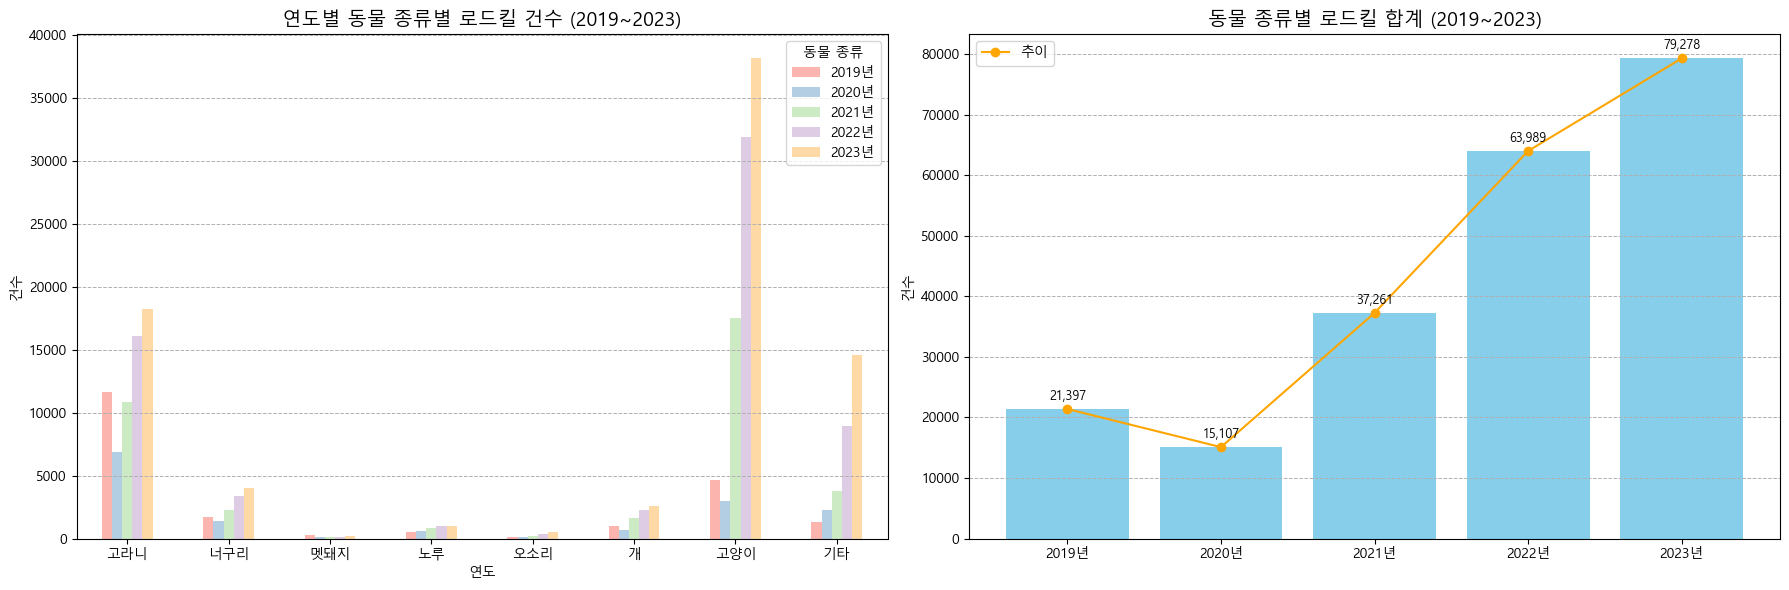

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_종별_통계.csv'
df_종별 = pd.read_csv(file_path, encoding='utf-8')

# 숫자형 변환
for col in df_종별.columns[1:]:
    df_종별[col] = df_종별[col].astype(str).str.replace(',', '').astype(int)

# 인덱스 설정
df_종별.set_index('구 분', inplace=True)

# 혹시 '합계'라는 행이 있다면 제거
df_종별 = df_종별[~(df_종별.index == '합계')]

# 행별 합계 계산
df_종별['합계'] = df_종별.sum(axis=1)

# 합계 제외한 데이터프레임 (연도별 시각화용)
df_no_total = df_종별.drop(columns='합계')

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# ▶ 왼쪽: 연도별 동물별 막대차트
colors = plt.cm.Pastel1.colors
df_no_total.T.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('연도별 동물 종류별 로드킬 건수 (2019~2023)', fontsize=14)
ax1.set_ylabel('건수')
ax1.set_xlabel('연도')
ax1.grid(True, axis='y', linestyle='--', linewidth=0.7)
ax1.legend(title='동물 종류')
ax1.tick_params(axis='x', rotation=0)

# ▶ 오른쪽: 동물 종류별 합계 막대 + 꺾은선
bars = ax2.bar(df_종별.index, df_종별['합계'], color='skyblue')
ax2.plot(df_종별.index, df_종별['합계'], color='orange', marker='o', label='추이')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{height:,}', 
             ha='center', va='bottom', fontsize=9)

ax2.set_title('동물 종류별 로드킬 합계 (2019~2023)', fontsize=14)
ax2.set_ylabel('건수')
ax2.grid(True, axis='y', linestyle='--', linewidth=0.7)
ax2.legend()

plt.tight_layout()
plt.show()


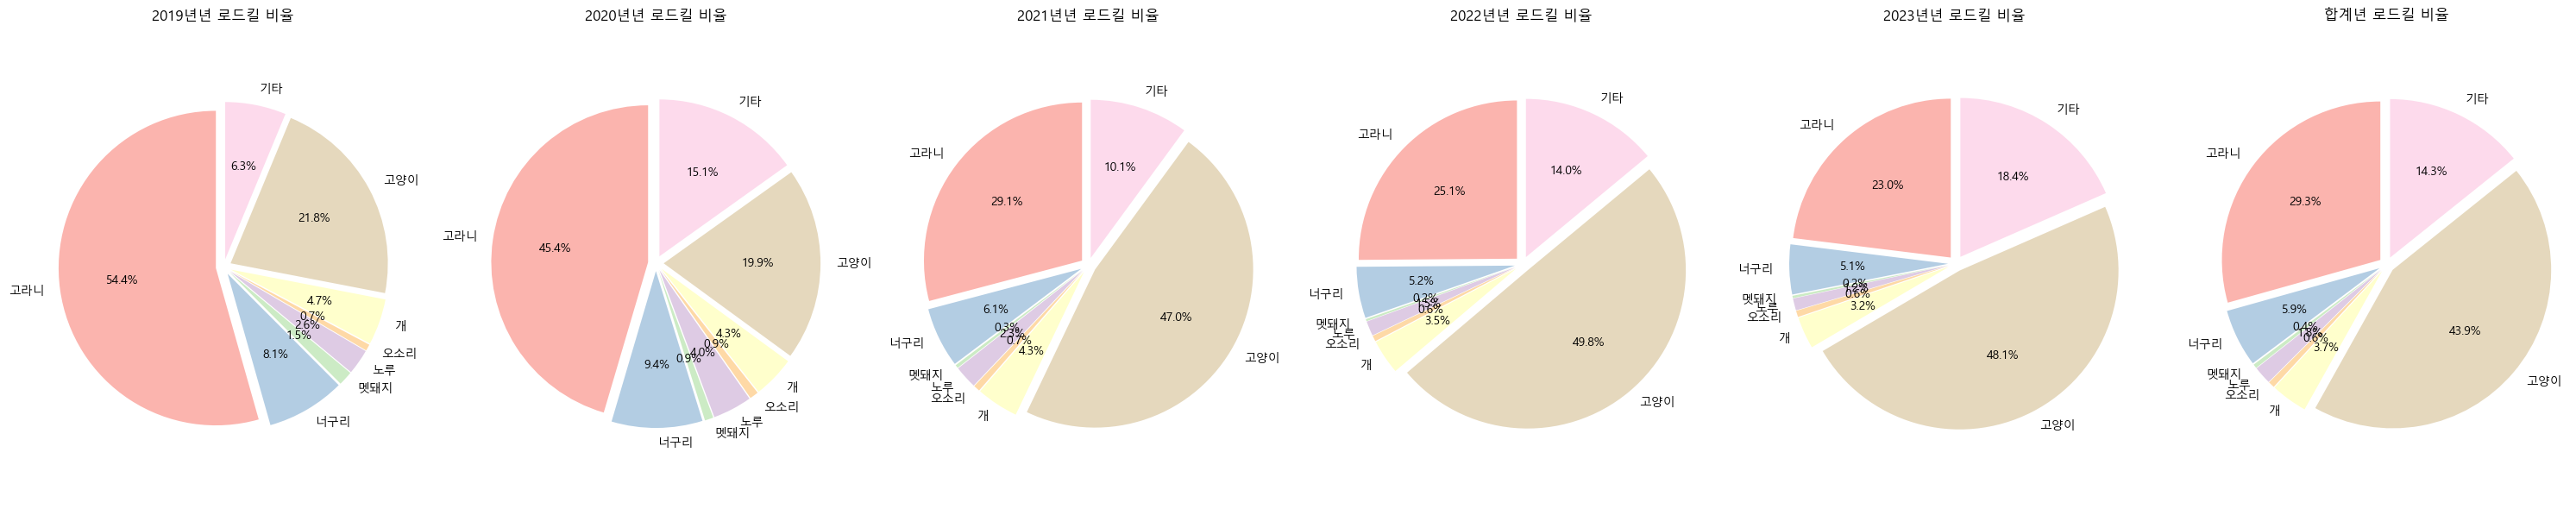

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = 'C:/githome/7week_Airdata_project/autocarz/data/로드킬근거자료19-23/로드킬_종별_통계.csv'
df_종별 = pd.read_csv(file_path, encoding='utf-8')

# 숫자형 변환
for col in df_종별.columns[1:]:
    df_종별[col] = df_종별[col].astype(str).str.replace(',', '').astype(int)

# 인덱스 설정
df_종별.set_index('구 분', inplace=True)

# 연도 목록 및 시각화
years = df_종별.index.tolist()
fig, axes = plt.subplots(1, len(years), figsize=(30, 6))  # ✔️ 자동 개수 반영

colors = plt.cm.Pastel1.colors
explode = [0.05] * len(df_종별.columns)  # 전체 항목 분리

for i, year in enumerate(years):
    wedges, texts, autotexts = axes[i].pie(
        df_종별.loc[year],
        labels=df_종별.columns,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode
    )
    axes[i].set_title(f'{year}년 로드킬 비율', fontsize=12)
    axes[i].axis('equal')

plt.tight_layout()
plt.show()


# 도교공사고유형별(19-23)

In [ ]:
import pandas as pd

base_path = './data/도교공사고유형별(19-23)/'

df_2019 = pd.read_csv(base_path + '도로교통공단_사고유형별_교통사고(2019).csv', encoding='cp949')
df_2020 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2020).csv', encoding='cp949')
df_2021 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2021).csv', encoding='cp949')
df_2022 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2022).csv', encoding='cp949')
df_2023 = pd.read_csv(base_path + '도로교통공단_사고유형별 교통사고(2023).csv', encoding='cp949')

print(df_2020.head())


# 보험사민원건수 19-23 & 한국도로공사_교통사고통계_20231231
